In [53]:
%matplotlib inline
import base64
import geopandas as gpd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import sys
sys.path.insert(0, os.path.expanduser('~/facets/facets_overview/python/'))
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

In [6]:
df = pd.read_csv('geocoded_evictions.csv',
                converters={
                    'Geo.FIPS.State': str,
                    'Geo.FIPS.County': str,
                    'Geo.Tract': str,
                    'Disposition.Date': pd.to_datetime,
                })

S:\programs\x64\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2683: DtypeWarning: Columns (0,1,6,32,33,34,35,36,37,38,39,40,41,42,43,44,50,51,52,53,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Case.Number', 'Case.Number.1', 'Case.Type', 'Case.Subtype',
       'Case.File.Date', 'Style.Of.Case', 'Nature.of.Claim', 'Claim.Amount',
       'Case.Status', 'Plaintiff.Name', 'Plaintiff.Addr.Line.1',
       'Plaintiff.Addr.Line.2', 'Plaintiff.Addr.City', 'Plaintiff.Addr.State',
       'Plaintiff.Addr.ZIP.1', 'Plaintiff.Atty.Name', 'Plaintiff.Atty.Addr.1',
       'Plaintiff.Atty.Addr.2', 'Plaintiff.Atty.City', 'Plaintiff.Atty.State',
       'Plaintiff.Atty.ZIP.1', 'Defendant.Name', 'Defendant.Addr.Line.1',
       'Defendant.Addr.Line.2', 'Defendant.Addr.City', 'Defendant.Addr.State',
       'Defendant.Addr.ZIP.1', 'Defendant.Atty.Name', 'Defendant.Atty.Addr.1',
       'Defendant.Atty.Addr.2', 'Defendant.Atty.City', 'Defendant.Atty.State',
       'Defendant.Atty.ZIP.1', 'Second.Plaintiff.Name',
       'Second.Plaintiff.Addr.Line.1', 'Second.Plaintiff.Addr.Line.2',
       'Second.Plaintiff.Addr.City', 'Second.Plaintiff.Addr.State',
       'Second.Plaintiff.Addr.ZIP.1', 'Second.P

In [7]:
ts = df.set_index('Disposition.Date').sort_index()
ts['count']=1

year
2011    Axes(0.125,0.125;0.775x0.755)
2012    Axes(0.125,0.125;0.775x0.755)
2013    Axes(0.125,0.125;0.775x0.755)
2014    Axes(0.125,0.125;0.775x0.755)
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
2017    Axes(0.125,0.125;0.775x0.755)
Name: count, dtype: object

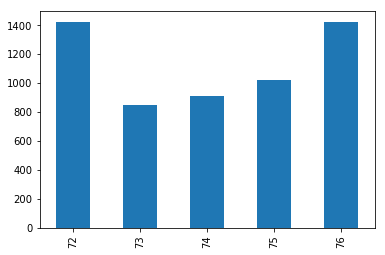

In [42]:
monthly_counts = ts['count'].resample('1M').sum().reset_index()
monthly_counts['month'] = monthly_counts['Disposition.Date'].dt.month
monthly_counts['year'] = monthly_counts['Disposition.Date'].dt.year
monthly_counts.groupby('year')['count'].plot(kind='bar')

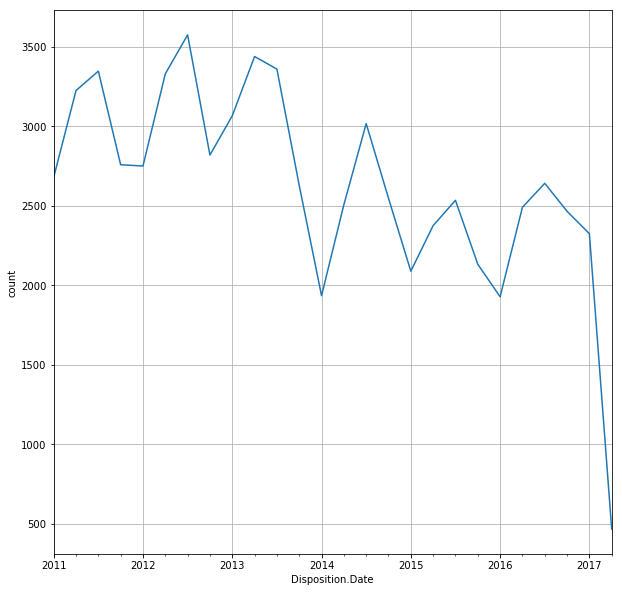

In [57]:
quarterly_counts = ts['count'].resample('1Q').sum().plot(figsize=(10,10))
plt.gca().grid(True)
plt.gca().set_ylabel('count')

In [5]:
df['Disposition.Date'].dt.year().head()


AttributeError: Can only use .dt accessor with datetimelike values